In [25]:
import pandas 

read_counts_ikir_scores = pandas.read_csv("~/project2_KIR/counts_with_func_ikir_scores.csv", index_col=0)

In [3]:
read_counts_ikir_scores = read_counts_ikir_scores.drop(["functional_ikir_count", "Age", "CD4", "Gender", "HIV_VL"], axis=1)
read_counts_ikir_scores.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000284585,ENSG00000284586,ENSG00000284587,ENSG00000284591,ENSG00000284592,ENSG00000284594,ENSG00000284595,ENSG00000284596,ENSG00000284600,score
StudyID,,,,,,,,,,,,,,,,,,,,,
RN001,1.126534,0.0,127.298394,337.960339,188.131255,3512.534452,92.375826,120.539187,1176.101978,739.006607,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.75
RN002,0.000000,0.0,103.687947,209.408990,123.002368,4094.657343,56.926716,204.326248,1805.390129,758.345178,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.00
RN003,3.084420,0.0,99.318310,362.727739,146.818371,3331.173116,6.168839,64.772811,413.312220,733.474969,...,0.0,0.0,0.0,0.0,0.0,0.616884,0.0,0.0,0.0,0.75
RN004,0.000000,0.0,79.024065,315.289892,182.239171,3398.034799,21.771936,99.183265,412.860422,823.301739,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.00
RN006,0.000000,0.0,138.950353,335.278215,163.836983,3788.989477,184.575842,85.720616,782.546267,775.633314,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,3.75


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [5]:
from sklearn.model_selection import train_test_split

features = read_counts_ikir_scores.columns[0:58233]

y = read_counts_ikir_scores["score"].values
X = read_counts_ikir_scores.drop(["score"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=16)

scaled_x_train = pandas.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
scaled_x_test = pandas.DataFrame(scaler.fit_transform(X_test), index=X_test.index, columns=X_test.columns)

In [59]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)

model = LassoCV(alphas= [0.0001, 0.001, 0.01, 0.1, 1, 10], random_state=0, max_iter=1000, cv = cv)

model.fit(scaled_x_train, y_train)

print('alpha: %f' % model.alpha_)


alpha: 0.100000


In [6]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.1, max_iter=100, tol=0.1)

lasso.fit(scaled_x_train, y_train)

print(lasso.score(scaled_x_test, y_test))
print(lasso.score(scaled_x_train, y_train))

0.055178728255083076
0.8339194804492855


In [7]:
from sklearn.linear_model import Lasso

lasso_default = Lasso()

lasso_default.fit(scaled_x_train, y_train)

print(lasso_default.score(scaled_x_test, y_test))
print(lasso_default.score(scaled_x_train, y_train))

-0.03943288781283183
0.0


In [8]:
from sklearn import metrics
from sklearn.linear_model import Lasso

lasso.fit(scaled_x_train, y_train)

y_predicted_train = lasso.predict(scaled_x_train)
y_predicted_test = lasso.predict(scaled_x_test)

mse = metrics.mean_squared_error(y_test, y_predicted_test)
mse_train = metrics.mean_absolute_error(y_train, y_predicted_train)

print(f"Mean Squared Error: {mse_train}")
print(f"Mean Sqared Error: {mse}")

Mean Squared Error: 0.3587967452301726
Mean Sqared Error: 0.8498562359204224


In [22]:
import numpy as np

# Extract coefficients and sort by their absolute values
coefficients = lasso.coef_
sorted_indices = np.argsort(np.abs(coefficients))[::-1]  # Sort in descending order

# Display the top-n important features
n = 58250
for i in range(n):
    idx = sorted_indices[i]
    print(f"Feature: {features[idx]}, Coefficient: {coefficients[idx]:.12f}")

Feature: ENSG00000169814, Coefficient: 0.146566860492
Feature: ENSG00000232134, Coefficient: 0.110531581888
Feature: ENSG00000125498, Coefficient: 0.098556530429
Feature: ENSG00000141622, Coefficient: 0.085569455357
Feature: ENSG00000177627, Coefficient: 0.079311215375
Feature: ENSG00000124164, Coefficient: -0.076087237116
Feature: ENSG00000171311, Coefficient: -0.072865790975
Feature: ENSG00000231789, Coefficient: 0.062623672978
Feature: ENSG00000185834, Coefficient: -0.062062038356
Feature: ENSG00000169718, Coefficient: -0.058963879568
Feature: ENSG00000256756, Coefficient: -0.058028259469
Feature: ENSG00000257591, Coefficient: 0.055567716468
Feature: ENSG00000165795, Coefficient: -0.054216352892
Feature: ENSG00000257764, Coefficient: -0.051224605486
Feature: ENSG00000279077, Coefficient: -0.046830331240
Feature: ENSG00000150938, Coefficient: 0.044437628834
Feature: ENSG00000137843, Coefficient: 0.042409398136
Feature: ENSG00000272053, Coefficient: -0.040358927047
Feature: ENSG000001

IndexError: index 58233 is out of bounds for axis 0 with size 58233

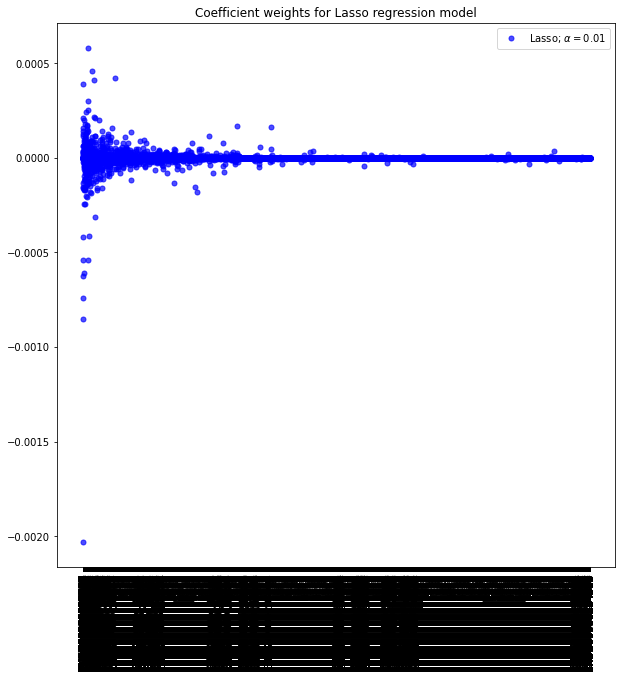

In [7]:
import matplotlib.pyplot as plt
#plot size
plt.figure(figsize = (10, 10))
#add plot for ridge regression
plt.plot(features,model_new.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='blue',label=r'Lasso; $\alpha = 0.01$',zorder=7)

#rotate axis
plt.xticks(rotation = 90)
plt.legend()
plt.title("Coefficient weights for Lasso regression model")
plt.show()

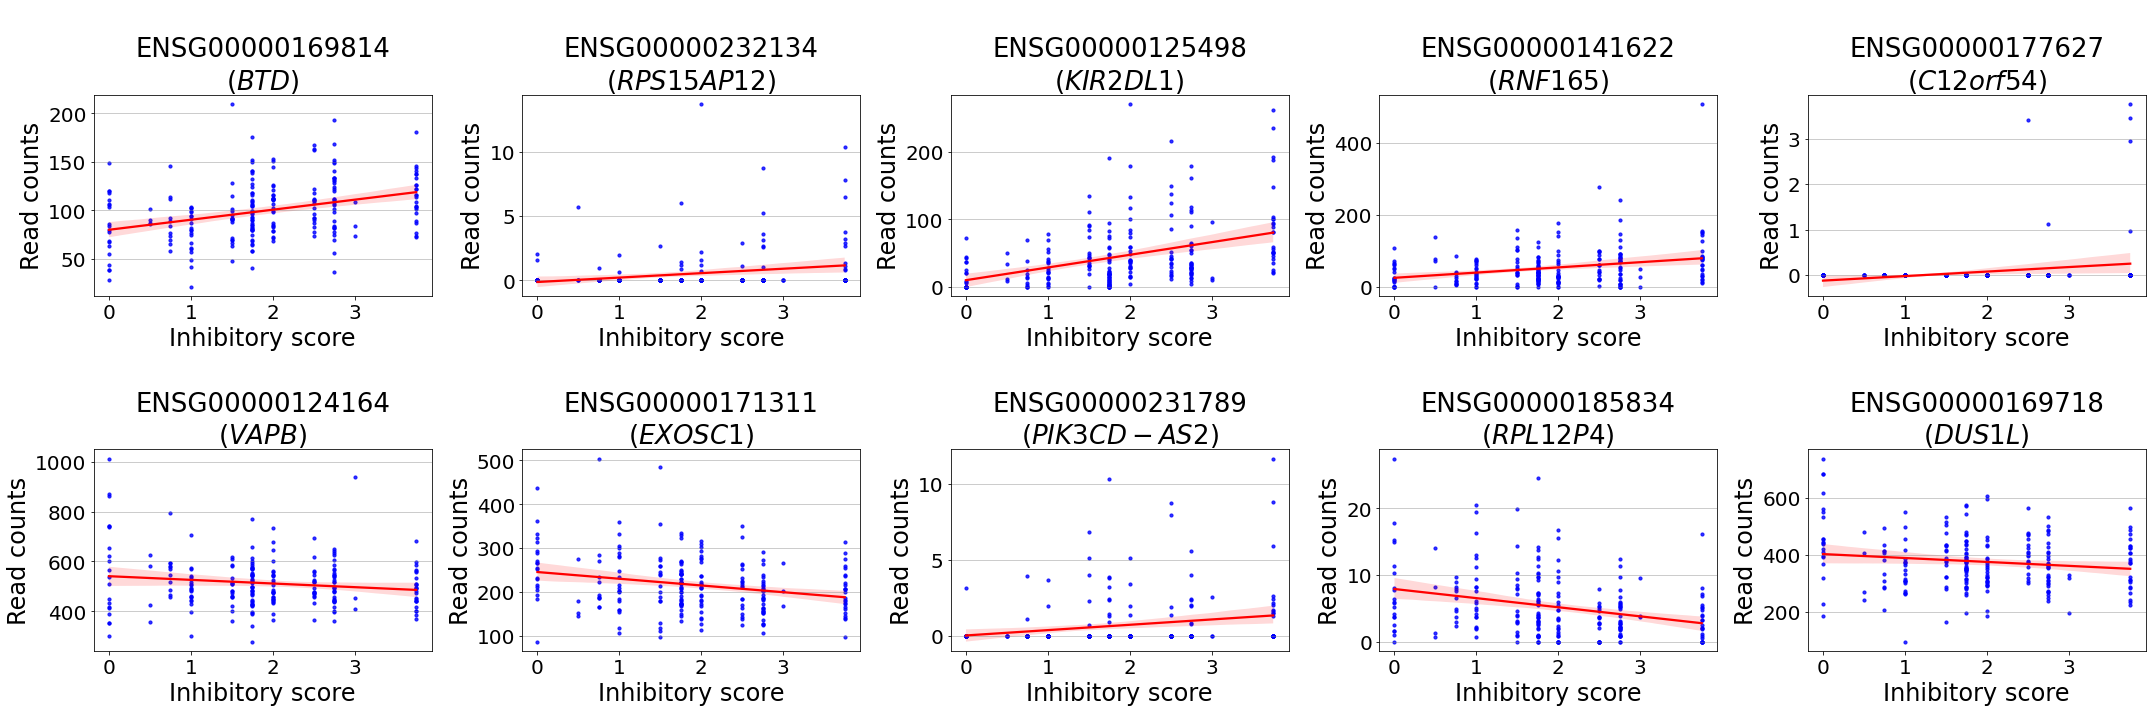

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

genes_of_interest = ['ENSG00000169814',
'ENSG00000232134',
'ENSG00000125498',
'ENSG00000141622',
'ENSG00000177627',
'ENSG00000124164',
'ENSG00000171311',
'ENSG00000231789',
'ENSG00000185834',
'ENSG00000169718',
]

gene_name = ['BTD',
'RPS15AP12',
'KIR2DL1',
'RNF165',
'C12orf54',
'VAPB',
'EXOSC1',
'PIK3CD-AS2',
'RPL12P4',
'DUS1L'
]

ids_and_names = zip(genes_of_interest, gene_name)

fig, axes = plt.subplots(2, 5, figsize=(30, 10))
axes_flat = axes.flatten()

for ax, gene in zip(axes_flat, ids_and_names):
    sns.regplot(data=read_counts_ikir_scores, x="score", y=gene[0], ax=ax, scatter_kws={"s": 10, "color": "blue"}, line_kws={"color": "red"})
    ax.yaxis.grid(True, linestyle='-', which='major', color='gray', alpha=0.5)
    
    if gene[1].startswith('Novel'):
        ax.set_title(f'\n{gene[0]}\n({gene[1]})', fontsize=26)
    else:
        ax.set_title(f'\n{gene[0]}\n(${gene[1]}$)', fontsize=26)
        
    ax.set_ylabel('Read counts', fontsize=24)
    ax.set_xlabel('Inhibitory score', fontsize=24)
    ax.tick_params(labelsize=20)
    
plt.tight_layout()
plt.show()

In [26]:
import statsmodels.api as sm

genes_of_interest = ['ENSG00000253218',
'ENSG00000151725',
'ENSG00000241666',
'ENSG00000271105',
'ENSG00000130158',
'ENSG00000004777',
'ENSG00000253372',
'ENSG00000139239',
'ENSG00000278743',
'ENSG00000211787'
]

for gene in genes_of_interest:
    # Prepare data
    X = read_counts_ikir_scores["functional_ikir_count"]
    y = read_counts_ikir_scores[gene]
    
    # Add a constant to the independent variable (required for statsmodels regression)
    X = sm.add_constant(X)
    
    # Fit the linear regression model
    model = sm.OLS(y, X).fit()
    
    # Extract the p-value for the slope (located at index 1 because index 0 is for the intercept)
    slope_p_value = model.pvalues[1]
    
    # Print the result for the current gene
    print(f"Gene: {gene}")
    print(model.summary())
    print("-----------------------")
    
    # Optional: If you want the full summary for each gene, you can print model.summary()

Gene: ENSG00000253218
                            OLS Regression Results                            
Dep. Variable:        ENSG00000253218   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     13.18
Date:                Tue, 29 Aug 2023   Prob (F-statistic):           0.000351
Time:                        00:57:53   Log-Likelihood:                -803.65
No. Observations:                 225   AIC:                             1611.
Df Residuals:                     223   BIC:                             1618.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const   